<a href="https://colab.research.google.com/github/tarun-jain98/DemoApp/blob/master/Assingment5/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

#Imports all the basic requirements.

In [95]:
# example of standardizing a image dataset
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape dataset to have a single channel
width, height, channels = X_train.shape[1], X_train.shape[2], 1
X_train = X_train.reshape((X_train.shape[0], width, height, channels))
X_test = X_test.reshape((X_test.shape[0], width, height, channels))
# report pixel means and standard deviations
print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (X_train.mean(), X_train.std(), X_test.mean(), X_test.std()))
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))
# demonstrate effect on a single batch of samples
iterator = datagen.flow(X_train, y_train, batch_size=64)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())
# demonstrate effect on entire training dataset
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train), shuffle=False)
# get a batch
batchX, batchy = iterator.next()
# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())



datagen.fit(X_test)

iterator = datagen.flow(X_test, y_test, batch_size=64)

testX, testy = iterator.next()

iterator = datagen.flow(X_test, y_test, batch_size=len(X_train), shuffle=False)

testX, testy = iterator.next()

Statistics train=33.318 (78.567), test=33.791 (79.172)
Data Generator mean=33.318, std=78.567
(64, 28, 28, 1) -0.043359917 0.9497284
(60000, 28, 28, 1) -3.4560264e-07 0.9999998


#Add image normalization to training as well as test data.

In [0]:
batchX = batchX.astype('float32')
testX = testX.astype('float32')
batchX /= 255
testX /= 255

In [0]:
batchy[:10]
batchy = np_utils.to_categorical(batchy, 10)
testy = np_utils.to_categorical(testy, 10)

In [0]:
batchy[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
import keras
from keras.layers import Activation
from keras import regularizers
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l2(0.01))) #26
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01))) #24
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu',kernel_regularizer=regularizers.l2(0.01))) #22
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#9
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#7
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#5
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, 3, activation='relu',kernel_regularizer=regularizers.l2(0.01)))#3
model.add(Dropout(0.1))

model.add(BatchNormalization())
model.add(Convolution2D(10, 4, 4,kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))


# keras.regularizers.l2(0.01)
model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", kernel_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
dropout_40 (Dropout)         (None, 26, 26, 16)        0         
_________________________________________________________________
batch_normalization_39 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
dropout_41 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
dropout_42 (Dropout)         (None, 24, 24, 10)        0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), kernel_regularizer=<keras.reg...)`


#The basic model architecture. 

In [67]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


filepath="weights-improvement.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
lr=LearningRateScheduler(scheduler, verbose=1)
callbacks_list = [lr,checkpoint]

model.fit(batchX, batchy, batch_size=128, epochs=40, verbose=1, validation_data=(testX, testy), callbacks=callbacks_list)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 17s 291us/step - loss: 0.8296 - acc: 0.8619 - val_loss: 0.6090 - val_acc: 0.8580

Epoch 00001: val_acc improved from -inf to 0.85800, saving model to weights-improvement.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 8s 128us/step - loss: 0.3254 - acc: 0.9308 - val_loss: 0.5376 - val_acc: 0.8672

Epoch 00002: val_acc improved from 0.85800 to 0.86720, saving model to weights-improvement.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 8s 127us/step - loss: 0.2794 - acc: 0.9368 - val_loss: 0.2154 - val_acc: 0.9645

Epoch 00003: val_acc improved from 0.86720 to 0.96450, saving model to weights-improvement.hdf5
Epoch 4/40

Epoch 00004: Lear

In [93]:
from keras.models import load_model
model = load_model('weights-improvement.hdf5')
score = model.evaluate(testX, testy, verbose=0)
print(score)

[0.06274995970129967, 0.9923]


[2, 3, 5, 6, 7, 10, 13, 14, 20, 21, 25, 28, 29, 31, 36, 37, 39, 40, 42, 46, 55, 57, 61, 62, 65]


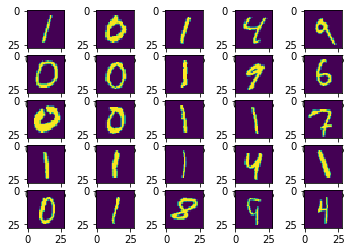

In [97]:
l=[]
misclassified = np.nonzero(model.predict_classes(X_test).reshape((-1,)) != y_test)
for i in range(25):
  l.append(misclassified[0][i])
print(l) 

(X_train, y_train), (X_test, y_test) = mnist.load_data()
from matplotlib import pyplot as plt
%matplotlib inline

for idx in range(25):  
  v=l[idx]
  plt.subplot(5,5,idx+1)
  plt.imshow(X_test[v])
  